<h2>About the Dataset</h2>

          Aspiring Minds' Employability Outcomes 2015 (AMEO 2015), a unique dataset which provides engineering graduates' employment outcomes (salaries, job titles and job locations) together with standardized assessment scores in three fundamental areas - cognitive skills, technical skills and personality. Coupled with biodata information, AMEO 2015 provides an opportunity for a unique and comprehensive study of the entry level labor market.

In [ ]:
<h2>Description of the Columns in the dataset</h2>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

In [26]:
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [27]:
print(df.shape)

(3998, 39)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [29]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [30]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [33]:
df.describe(include=object)

,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
count,3998,3998,3998,3998,3998,3998,3998,3998,3998
unique,67,419,339,2,275,340,4,46,26
top,present,software engineer,Bangalore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,1875,539,627,3041,1395,1400,3700,880,915


In [31]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [59]:
df.set_index('ID', inplace = True)

In [60]:
df.head(2)

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,
203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.300,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.974,0.813,0.527,1.355,-0.446
579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.400,cbse,2007,...,-1,-1,-1,-1,-1,-0.734,0.379,1.240,-0.108,0.864


### Check for missing values

In [61]:
Total = df.isnull().sum().sort_values(ascending=False)

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

missing_data

,Total,Percentage of Missing Values
Salary,0,0.000
CollegeState,0,0.000
English,0,0.000
Logical,0,0.000
Quant,0,0.000
Domain,0,0.000
ComputerProgramming,0,0.000
ElectronicsAndSemicon,0,0.000
ComputerScience,0,0.000
MechanicalEngg,0,0.000


**Interpretation:** 
    We can interpret that the dataset has no missing values.

### Univariate Analysis

In [62]:
df['Salary'].describe()

count      3998.000
mean     307699.850
std      212737.500
min       35000.000
25%      180000.000
50%      300000.000
75%      370000.000
max     4000000.000
Name: Salary, dtype: float64

In [63]:
#This method converts the value into normal from scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [64]:
df['Salary'].describe()

count      3998.000
mean     307699.850
std      212737.500
min       35000.000
25%      180000.000
50%      300000.000
75%      370000.000
max     4000000.000
Name: Salary, dtype: float64

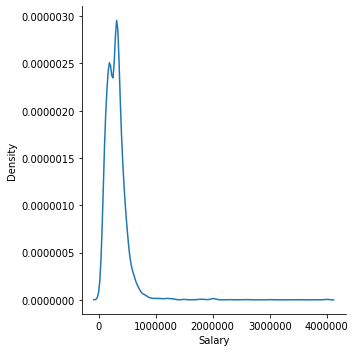

In [65]:
sns.displot(df['Salary'], kind = 'kde')
plt.show()

In [66]:
df['Salary'].skew()

6.451081166224832

In [67]:
df['Salary'].kurtosis()

80.92999627162538

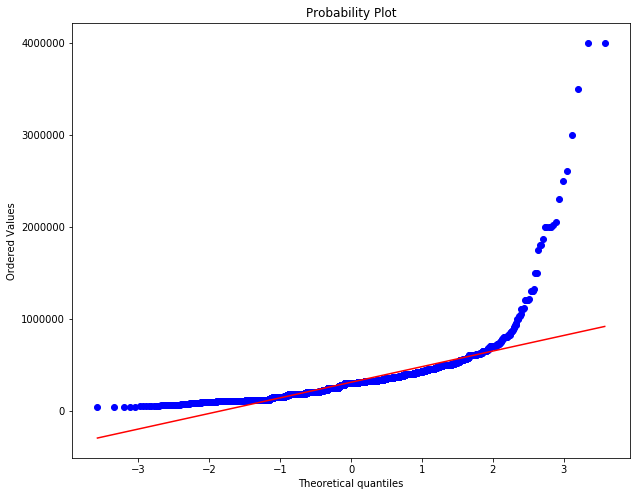

In [68]:
#Plot Q_Q Plot to check Normality

plt.figure(figsize=(10,8))
stats.probplot(df['Salary'], dist = 'norm', plot = plt)
plt.show()

The data is not normally distributed

In [69]:
#Applying Box-Cox Transformation

x,l = stats.boxcox(df['Salary'])
print(l)

0.0433021109192567


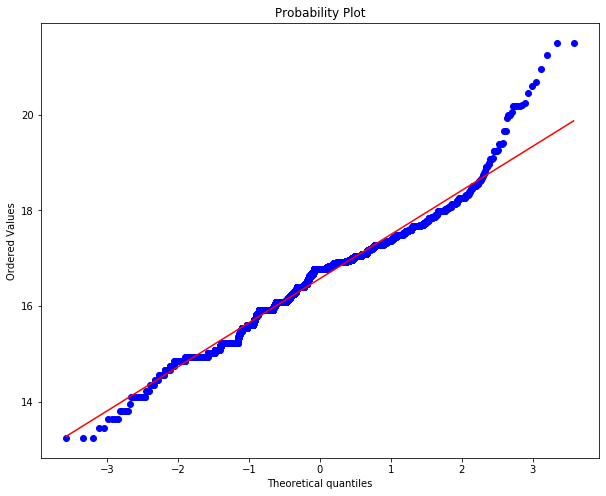

In [70]:
plt.figure(figsize=(10,8))
stats.probplot(x, dist = 'norm', plot = plt)
plt.show()

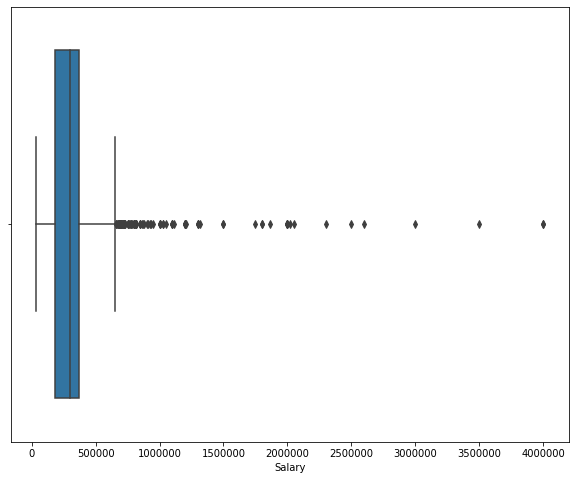

In [71]:
plt.figure(figsize=(10,8))
sns.boxplot(x = df['Salary'])

In [74]:
indexNames = df[df['Salary'] > 1000000].index

df.drop(indexNames, inplace = True)
df.shape

(3962, 37)

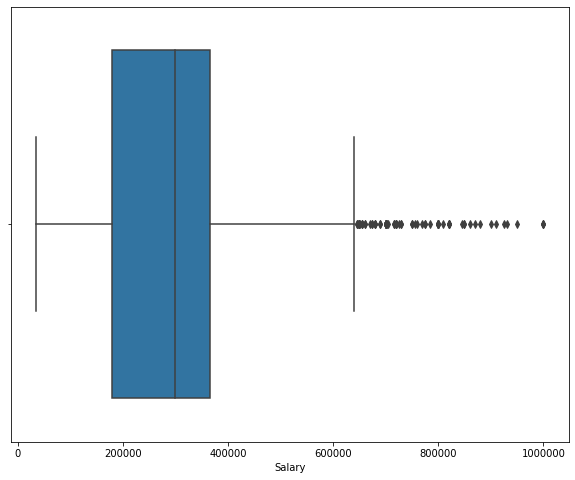

In [75]:
plt.figure(figsize=(10,8))
sns.boxplot(x = df['Salary'])

In [77]:
#Dropping Columns

df.drop(columns= ['CollegeCityID','CollegeCityID','12graduation'], axis = 1, inplace=True) 

In [79]:
#Analysing Designation Column

df['Designation'].value_counts()

software engineer     538
software developer    264
system engineer       205
programmer analyst    139
systems engineer      118
                     ... 
software devloper       1
sap mm consultant       1
cnc programmer          1
controls engineer       1
visiting faculty        1
Name: Designation, Length: 417, dtype: int64

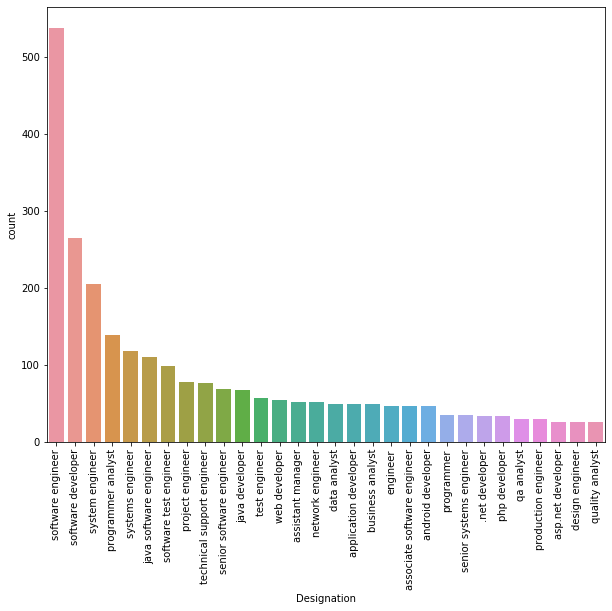

In [92]:
plt.figure(figsize=(10,8))
sns.countplot(x = df['Designation'], order = df['Designation'].value_counts().iloc[:30].index)
plt.xticks(rotation = 90)
plt.show()

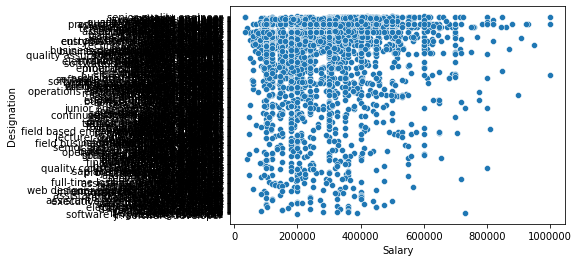

In [93]:
sns.scatterplot(x = df['Salary'], y = df['Designation'])
plt.show()